# Choosing the most accurate model
*************
The project involves applying multiple models to the available data and selecting the most accurate model.

In this project, you have implemented multiple models and evaluated their performance on the given dataset. The goal is to determine which model provides the most accurate predictions for the task at hand. By comparing the performance of the different models, you can choose the one that yields the highest accuracy or the best fit to the data. This process allows you to identify the most suitable model for making predictions based on the available data.

The data on which we will apply the models is the **natural gas production data in Saudi Arabia for a period of 10 years**.
****
- overview of the steps:
    1. Import the necessary libraries.
    2. Data Preparation.
    3. EDA.
    4. Data Splitting.
    5. Applying Different Models.
    6. Evaluating Model Performance.
    7. Selecting the Most Accurate Model.
*************
    

# Import the necessary libraries.

In [1]:
import pandas as pd     # Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt     # Import the matplotlib.pyplot module for data visualization
import seaborn as sns     # Import the seaborn library for advanced data visualization

# Data Preparation & EDA.

In [2]:
# Read the data using pandas and store it in the 'data' variable
data = pd.read_excel('natural-gas-production.xlsx')

# Print the contents of the 'data' DataFrame
data

,Natural gas marketed production\n(million standard cu m),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Saudi Arabia,87660,92260,99330,100030,102380,104450,110860,115000.22,118000,117000,119000,120484.9224


$$\quad\text{In this data, we have one row and multiple columns for the years.}$$ $$\quad\text{We can reshape the table later.}$$

In [3]:
data.shape

(1, 13)

In [4]:
data.columns

Index(['Natural gas marketed production\n(million standard cu m)',
                                                             2010,
                                                             2011,
                                                             2012,
                                                             2013,
                                                             2014,
                                                             2015,
                                                             2016,
                                                             2017,
                                                             2018,
                                                             2019,
                                                             2020,
                                                             2021],
      dtype='object')

In [5]:
# Renaming the 'Natural gas marketed production' column to 'gas market'
data.rename(columns=({"Natural gas marketed production\n(million standard cu m)":'gas market'}),inplace=True)
data

,gas market,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Saudi Arabia,87660,92260,99330,100030,102380,104450,110860,115000.22,118000,117000,119000,120484.9224


In this data, we have one row and multiple columns for the years. We can reshape the table so that all the years in the columns are placed under one column called "Year," and there is one column for the data within each year.

- Transform the dataframe using the melt function
- Set the 'gas market' column as the identifier variable (id_vars)
- Set the column with the years as the variable name (var_name)
- Set the values in the columns as the production values (value_name)

In [6]:
data = data.melt(id_vars='gas market',var_name='Year',value_name='production')
data

,gas market,Year,production
0,Saudi Arabia,2010,87660.0000
1,Saudi Arabia,2011,92260.0000
2,Saudi Arabia,2012,99330.0000
3,Saudi Arabia,2013,100030.0000
4,Saudi Arabia,2014,102380.0000
5,Saudi Arabia,2015,104450.0000
6,Saudi Arabia,2016,110860.0000
7,Saudi Arabia,2017,115000.2200
8,Saudi Arabia,2018,118000.0000
9,Saudi Arabia,2019,117000.0000


In [7]:
data.dtypes

gas market     object
Year           object
production    float64
dtype: object

In [8]:
data['Year'] = data['Year'].astype(int)   # Convert the 'Year' column to integer type
data_2021 = data[data['Year'] == 2021]   # Filter the data for the year 2021
data = data[data['Year'] != 2021]   # Remove the data for the year 2021 from the original dataset
data.head(), data_2021   # Display the head of the updated dataset and the data for the year 2021

(     gas market  Year  production
 0  Saudi Arabia  2010     87660.0
 1  Saudi Arabia  2011     92260.0
 2  Saudi Arabia  2012     99330.0
 3  Saudi Arabia  2013    100030.0
 4  Saudi Arabia  2014    102380.0,
       gas market  Year   production
 11  Saudi Arabia  2021  120484.9224)

Uses the Matplotlib and Seaborn libraries to create a line plot visualizing the natural gas production over the years. The `plt.figure(figsize=())` line sets the figure size for the plot. The `sns.lineplot` function is used to plot the data, with the 'Year' column on the x-axis and the 'production' column on the y-axis. The `marker='o'` argument adds circular markers to the data points. The `plt.title`, `plt.xlabel`, and `plt.ylabel` functions are used to set the plot's title, x-axis label, and y-axis label respectively. The `plt.grid(True)` line enables grid lines on the plot. Finally, `plt.show()` is called to display the plot.

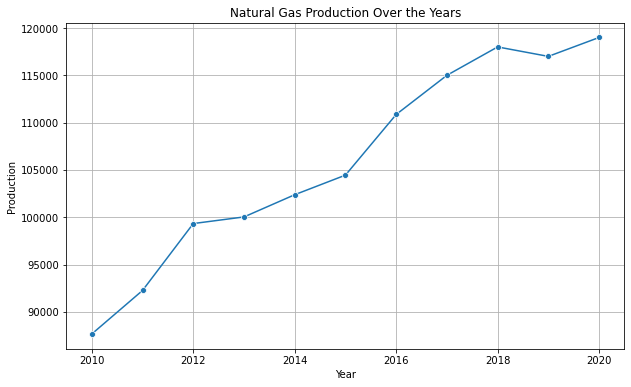

In [9]:
# Create a line plot of natural gas production over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='production', marker='o')

# Set the title, x-label, and y-label of the plot
plt.title('Natural Gas Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)   # Add grid lines to the plot
plt.show()   # Display the plot

# Data Splitting.


The `train_test_split` function from the `sklearn.model_selection` module. It then prepares the data for training and testing by assigning the 'Year' column to `X` and the 'production' column to `y`. The `reshape(-1,1)` method is used to reshape the 'Year' data to have a single feature column. Finally, the `train_test_split` function is called to split the data into training and testing sets, with 80% of the data used for training and 20% for testing, and a random state of 42 is set for reproducibility.


In [10]:
from sklearn.model_selection import train_test_split

X = data['Year'].values.reshape(-1,1)
y = data['production'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# Applying Different Models With Evaluation.

In this step, we apply different models to our dataset and evaluate their performance. 

1. We start by importing the necessary libraries and modules for the models we want to use. For example:

   ```python
   from sklearn.linear_model import LinearRegression
   from sklearn.tree import DecisionTreeRegressor
   from sklearn.ensemble import RandomForestRegressor


It includes the necessary import statements for `LinearRegression` and evaluation metrics like `mean_squared_error` and `r2_score`. The code then fits the linear regression model on the training data, predicts the target variable on the test data, and prints the actual test data and the first prediction. It also displays the coefficients of the model, calculates the mean squared error and the coefficient of determination (R-squared), and predicts the production for the year 2021. Finally, the predicted values for the entire dataset are added as a new column named 'Prediction_LR' in the `data` DataFrame.


- LinearRegression: A supervised learning algorithm that fits a linear equation to the data to predict continuous numeric values.

- mean_squared_error: A metric that measures the average squared difference between predicted and actual values, used to evaluate regression models.

- r2_score: A metric that represents the proportion of the variance in the dependent variable explained by the independent variables, ranging from 0 to 1.


- **Coefficients**: Coefficients are weights assigned to each feature in a linear regression model. They represent the magnitude and direction of the impact that each feature has on the predicted outcome. Positive coefficients indicate a positive relationship with the outcome, while negative coefficients indicate a negative relationship.

- **Mean Squared Error (MSE)**: MSE is a metric used to measure the average squared difference between the predicted values and the actual values in a regression problem. It provides a quantification of the overall accuracy of the model's predictions. A lower MSE value indicates that the model's predictions are closer to the actual values, suggesting better performance.

- **Coefficient of Determination (R^2 score)**: The R^2 score is a statistical measure that represents the proportion of the variance in the dependent variable (target) that can be explained by the independent variables (features) in a regression model. It ranges from 0 to 1, where a score of 1 indicates that the model perfectly predicts the target variable based on the features. A higher R^2 score indicates a better fit of the model to the data.


In [11]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Printing the actual test data and the first prediction
print(f'Real X test Data: {y_test}')
print(f'First Prediction: {y_pred}')

# Printing the coefficients of the model
print(f'Coefficients: {model.coef_}')

# Calculating and printing the mean squared error
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))

# Calculating and printing the coefficient of determination (R-squared score)
print('Coefficient of Determination: %.2f' % r2_score(y_test, y_pred))

# Making a prediction for the year 2021
pred_2021 = model.predict([[2021]])
print(f'Production Prediction for 2021: {pred_2021}')

# Adding the Linear Regression predictions to the 'Prediction_LR' column in the 'data' DataFrame
data['Prediction_LR'] = model.predict(X)


Real X test Data: [104450.  87660. 117000.]
First Prediction: [106720.44417423  91237.11114338 119107.11059891]
Coefficients: [3096.66660617]
Mean Squared Error: 7463518.65
Coefficient of Determination: 0.95
Production Prediction for 2021: [125300.44381125]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/2248041218.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_LR'] = model.predict(X)



Uses `matplotlib.pyplot` and `seaborn` libraries to create a scatter plot comparing the actual values (`y_test`) with the predicted values (`y_pred`). It also adds a diagonal line in red color to indicate perfect predictions. The plot is given a title, x-axis label, y-axis label, and grid lines for better visualization. Finally, the plot is displayed using `plt.show()`.


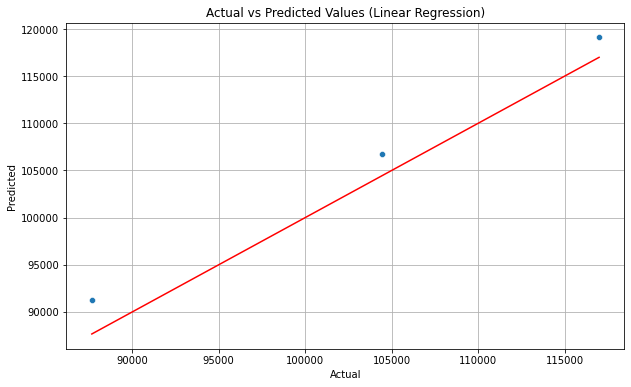

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

It combines multiple decision trees to create a robust and accurate prediction model. Each tree is trained on a random subset of the data, and the final prediction is obtained by averaging the predictions of all the individual trees. RandomForestRegressor is a versatile and powerful algorithm that can handle both numerical and categorical features, making it suitable for a wide range of regression problems.

In [13]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train,y_train)

y_pred_rf = model_rf.predict(X_test)
print(f'Real X test Data: {y_test}')
print(f'Frist Prediction: {y_pred_rf}')

print(f'Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_rf))
print('Coefficients of determination: %.2f'%r2_score(y_test,y_pred_rf))

y_pred_rf_2021 = model_rf.predict([[2021]])
print(f'production Prediction: {y_pred_rf_2021}')

data['Prediction_rf'] = model_rf.predict(X)

Real X test Data: [104450.  87660. 117000.]
Frist Prediction: [104936.3044  94854.     117968.6154]
Mean Sq Error: 17642781.25
Coefficients of determination: 0.88
production Prediction: [118408.6154]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/2872159355.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_rf'] = model_rf.predict(X)


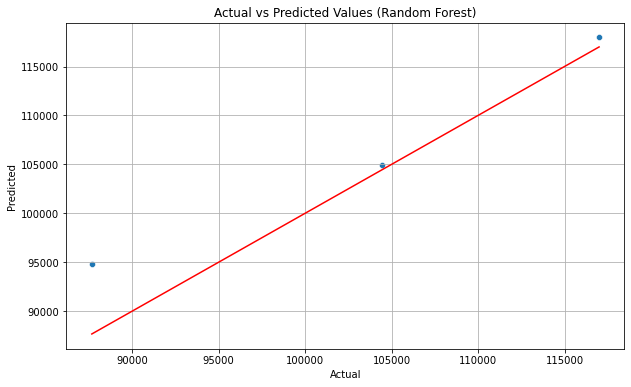

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

It is based on the principles of **Support Vector Machines (SVM)** and aims to find a regression function that best fits the data while maximizing the margin between the predicted values and the target variable.

SVR works by transforming the input data into a higher-dimensional feature space using a kernel function, where it seeks to find a hyperplane that best separates the data points while minimizing the error. The points that lie closest to the hyperplane, known as support vectors, play a crucial role in determining the regression function.

SVR provides a flexible approach to regression tasks and can handle nonlinear relationships between the features and the target variable. It offers different kernel functions, such as linear, polynomial, and radial basis function (RBF), allowing for various modeling options depending on the problem at hand.





In [15]:
from sklearn.svm import SVR

model_sv = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1)
model_sv.fit(X_train,y_train)

y_pred_sv = model_sv.predict(X_test)
print(f'Real X test Data: {y_test}')
print(f'First Prediction: {y_pred_sv}')

print('Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_sv))
print('Coefficients determination: %.2f'%r2_score(y_test,y_pred_sv))

y_pred_sv_2021 = model_sv.predict([[2021]])
print(f'production Prediction 2021: {y_pred_sv_2021}')

data['Prediction_sv'] = model_sv.predict(X)

Real X test Data: [104450.  87660. 117000.]
First Prediction: [106620.99056891 106418.25708294 106909.77648889]
Mean Sq Error: 152799339.78
Coefficients determination: -0.06
production Prediction 2021: [106791.56487234]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/1427526630.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_sv'] = model_sv.predict(X)


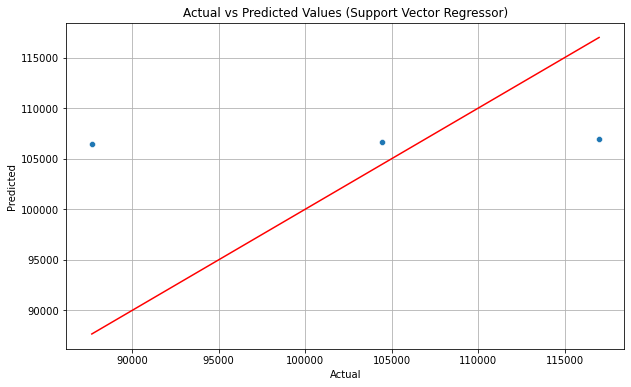

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_sv)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (Support Vector Regressor)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

`GradientBoostingRegressor` is a powerful machine learning algorithm from the `sklearn.ensemble` package that uses an ensemble of decision trees. It works by sequentially fitting new models to provide a more accurate estimate of the response variable, focusing on minimizing the loss function. This loss function, typically Mean Squared Error for regression problems, guides the model to focus more on difficult cases that previous models handled poorly. Thus, through boosting, `GradientBoostingRegressor` forms a strong predictive model from multiple weak decision trees.


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor(random_state=42)
model_GBR.fit(X_train,y_train)

y_pred_GBR = model_GBR.predict(X_test)
print(f'Real X test Data: {y_test}')
print(f'Frist Predection: {y_pred_GBR}')

print('Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_GBR))
print('Coefficients determination: %.2f'%r2_score(y_test,y_pred_GBR))

y_pred_GBR_2021 = model_GBR.predict([[2021]])
print(f'production Prediction 2021: {y_pred_GBR_2021}')

data['Prediction_GBR'] = model_GBR.predict(X)

Real X test Data: [104450.  87660. 117000.]
Frist Predection: [102380.09654231  92260.3943711  117999.72841984]
Mean Sq Error: 8815861.87
Coefficients determination: 0.94
production Prediction 2021: [118999.66312019]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/2547887833.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_GBR'] = model_GBR.predict(X)


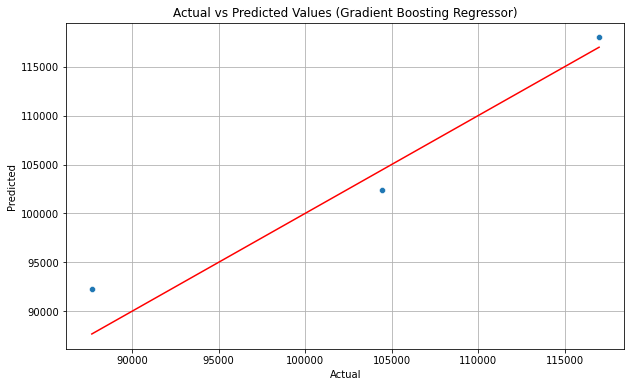

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_GBR)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (Gradient Boosting Regressor)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

`KNeighborsRegressor` is a machine learning model from the scikit-learn library that uses the k-nearest neighbors algorithm for regression tasks. The prediction for a new data point is made based on the average of the k-nearest neighbors in the training data, considering the Euclidean distance or other distance measures. This model is non-parametric and instance-based, meaning it doesn't make assumptions about the underlying data distribution and uses the training data instances themselves to make predictions. It can handle multi-dimensional features, making it versatile for various regression tasks.


In [19]:
from sklearn.neighbors import KNeighborsRegressor

model_KN = KNeighborsRegressor(n_neighbors=2)
model_KN.fit(X_train,y_train)

y_pred_KN = model_KN.predict(X_test)
print(f'Real X test Data: {y_test}')
print(f'First Prediction: {y_pred_KN}')

print('Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_KN))
print('Coefficients determination: %.2f'%r2_score(y_test,y_pred_KN))

y_pred_KN_2021 = model_KN.predict([[2021]])
print(f'production Prediction 2021: {y_pred_KN_2021}')

data['Prediction_KN'] = model_KN.predict(X)

Real X test Data: [104450.  87660. 117000.]
First Prediction: [106620.  95795. 118500.]
Mean Sq Error: 24379041.67
Coefficients determination: 0.83
production Prediction 2021: [118500.]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/1989986274.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_KN'] = model_KN.predict(X)


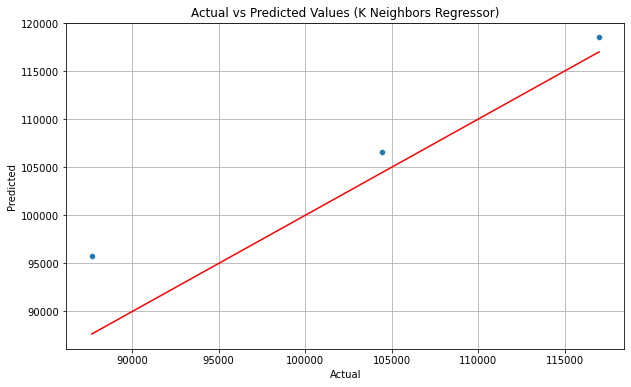

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_KN)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (K Neighbors Regressor)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

The `DecisionTreeRegressor` is a supervised machine learning model used for regression tasks in Python's Scikit-learn library. It builds a model in the form of a tree structure, splitting the data into subsets while developing the decision tree at the same time. The final prediction is the average of the dependent variable for the samples in the leaf node. With the ability to handle both categorical and numerical data, it is simple to understand, interpret and visualize.

In [21]:
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor(random_state=42)
model_DTR.fit(X_train,y_train)

y_pred_DTR = model_DTR.predict(X_test)
print(f'Real X test Data: {y_test}')
print(f'First Prediction: {y_pred_DTR}')

print('Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_DTR))
print('Coefficients detemination: %.2f'%r2_score(y_test,y_pred_DTR))

y_pred_DTR_2021 = model_DTR.predict([[2021]])
print(f'production Prediction 2021: {y_pred_DTR_2021}')

data['Prediction_DTR'] = model_DTR.predict(X)

Real X test Data: [104450.  87660. 117000.]
First Prediction: [102380.  92260. 118000.]
Mean Sq Error: 8814966.67
Coefficients detemination: 0.94
production Prediction 2021: [119000.]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/4188079748.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_DTR'] = model_DTR.predict(X)


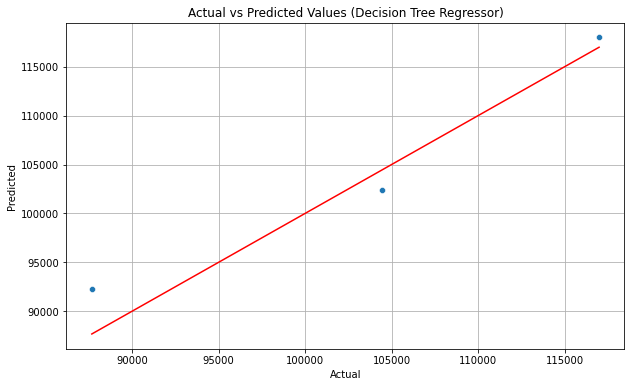

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_DTR)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

The AdaBoostRegressor is a machine learning algorithm that is used for regression problems. It works on the principle of "boosting," where several weak learners (typically decision trees) are combined to create a strong learner. AdaBoostRegressor, in particular, starts by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. This iterative process improves the model's accuracy by focusing more on the difficult-to-predict instances in the subsequent learners.


In [23]:
from sklearn.ensemble import AdaBoostRegressor

model_ABR = AdaBoostRegressor(random_state=42)
model_ABR.fit(X_train,y_train)

y_pred_ABR = model_ABR.predict(X_test)
print(f'Real X test Data: {y_test}')
print(f'First Prediction: {y_pred_ABR}')

print('Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_ABR))
print('Coefficients determination: %.2f'%r2_score(y_test,y_pred_ABR))

y_pred_ABR_2021 = model_ABR.predict([[2021]])
print(f'production Prediction 2021: {y_pred_ABR_2021}')

data['Prediction_ABR'] = model_ABR.predict(X)

Real X test Data: [104450.  87660. 117000.]
First Prediction: [102380.  92260. 118000.]
Mean Sq Error: 8814966.67
Coefficients determination: 0.94
production Prediction 2021: [118000.]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/2785195477.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_ABR'] = model_ABR.predict(X)


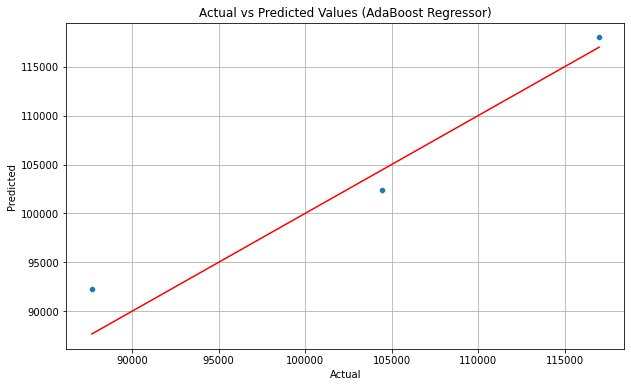

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ABR)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (AdaBoost Regressor)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

`MLPRegressor` is a class in `sklearn.neural_network` that implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which makes it useful for regression. MLPs are flexible models capable of capturing complex patterns in data by learning a nonlinear function approximation for either binary classification or for the multi-class classification case. The `MLPRegressor` allows customization of various parameters like the number of hidden nodes, activation function, and the type of solver for weight optimization. It requires numerical input features and is sensitive to feature scaling, so it's often beneficial to scale your data before training the MLP model.


In [25]:
from sklearn.neural_network import MLPRegressor

model_MLPR = MLPRegressor(random_state=42,max_iter=500)
model_MLPR.fit(X_train,y_train)

y_pred_MLPR = model_MLPR.predict(X_test)
print(f'Real X test Data: {y_test}')
print(f'First Prediction: {y_pred_MLPR}')

print('Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_MLPR))
print('Coefficients determination: %.2f'%r2_score(y_test,y_pred_MLPR))

y_pred_MLPR_2021 = model_MLPR.predict([[2021]])
print(f'production Preddiction 2021: {y_pred_MLPR_2021}')

data['Prediction_MLPR'] = model_MLPR.predict(X)

Real X test Data: [104450.  87660. 117000.]
First Prediction: [47678.11548497 47559.85839678 47772.72115551]
Mean Sq Error: 3207828121.40
Coefficients determination: -21.20
production Preddiction 2021: [47820.02399079]


/Users/mu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/1104670907.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_MLPR'] = model_MLPR.predict(X)


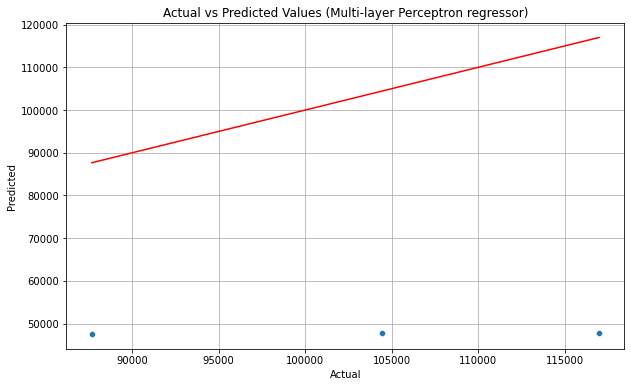

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_MLPR)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (Multi-layer Perceptron regressor)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

**Ridge Regression** is a technique used for analyzing multiple regression data suffering from multicollinearity (when predictor variables are highly correlated). It performs `L2 regularization`, which adds a penalty equivalent to square of the magnitude of coefficients. This shrinks the coefficients, reducing model complexity and multi-collinearity. By choosing an appropriate tuning parameter `λ`, Ridge Regression helps to improve model generalizability by reducing overfitting.


In [27]:
from sklearn.linear_model import Ridge 

model_R = Ridge(alpha=1.0)
model_R.fit(X_train,y_train)

y_pred_R = model_R.predict(X_test)
print(f'Real X test Data: {y_test}')
print(f'Frist Prediction: {y_pred_R}')

print('Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_R))
print('Coefficients determination: %.2f'%r2_score(y_test,y_pred_R))

y_pred_R_2021 = model_R.predict([[2021]])
print(f'production Prediction 2021: {y_pred_R_2021}')

data['Prediction_R'] = model_R.predict(X)

Real X test Data: [104450.  87660. 117000.]
Frist Prediction: [106725.98382826  91464.23695885 118935.38132379]
Mean Sq Error: 7799340.70
Coefficients determination: 0.95
production Prediction 2021: [125040.08007156]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/2626710813.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_R'] = model_R.predict(X)


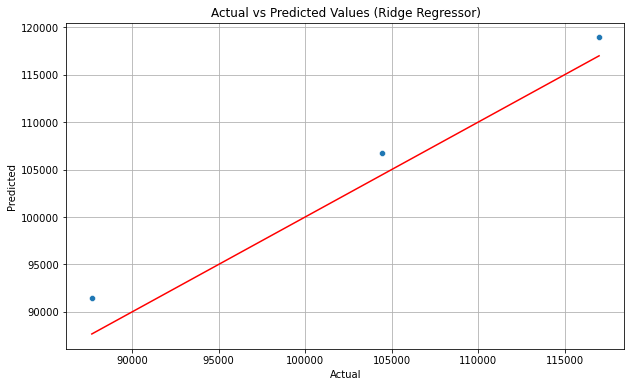

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_R)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (Ridge Regressor)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

**Lasso (Least Absolute Shrinkage and Selection Operator)** is a regression analysis method that performs both variable selection and regularization to enhance the prediction accuracy and interpretability of the model. It does this by imposing a constraint on the sum of the absolute values of the model parameters, effectively shrinking less important feature coefficients to zero. This helps to prevent overfitting by limiting the complexity of the model. Therefore, Lasso is particularly useful when dealing with high-dimensional data where feature selection is critical.


In [29]:
from sklearn.linear_model import Lasso

model_L = Lasso(alpha=0.1)
model_L.fit(X_train,y_train)

y_pred_L = model_L.predict(X_test)
print(f'Real X test Data: {y_test}')
print(f'First Prediction: {y_pred_L}')

print('Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_L))
print('Coefficients determination: %.2f'%r2_score(y_test,y_pred_L))

y_pred_L_2021 = model_L.predict([[2021]])
print(f'production Prediction 2021: {y_pred_L_2021}')

data['Prediction_L'] = model_L.predict(X)

Real X test Data: [104450.  87660. 117000.]
First Prediction: [106720.44562613  91237.17067151 119107.06558984]
Mean Sq Error: 7463599.58
Coefficients determination: 0.95
production Prediction 2021: [125300.37557169]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/1285490402.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_L'] = model_L.predict(X)


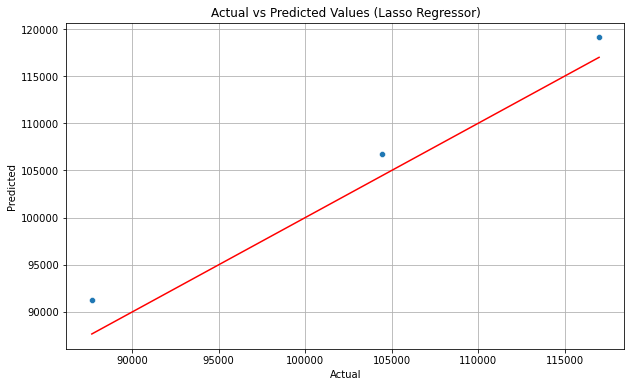

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_L)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (Lasso Regressor)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

`PolynomialFeatures` is a class in `sklearn.preprocessing` that generates polynomial and interaction features. It constructs new features from the original data set by considering all polynomial combinations that have a degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]. This transformation is useful for adding complexity to linear models with minimal feature sets.


In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly,y_train)

y_pred_poly = model_poly.predict(X_test_poly)
print(f'Real X test Data: {y_test}')
print(f'First Prediction: {y_pred_poly}')

print('Mean Sq Error: %.2f'%mean_squared_error(y_test,y_pred_poly))
print('Coefficients determination: %.2f'%r2_score(y_test,y_pred_poly))

y_pred_poly_2021 = model_poly.predict(poly.transform([[2021]]))
print(f'production Prediction 2021: {y_pred_poly_2021}')

data['Prediction_poly'] = model_poly.predict(poly.transform(X))

Real X test Data: [104450.  87660. 117000.]
First Prediction: [108112.03594995  87929.86005044 118384.66720974]
Mean Sq Error: 5133545.01
Coefficients determination: 0.96
production Prediction 2021: [121563.27968645]


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_32809/764399476.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction_poly'] = model_poly.predict(poly.transform(X))


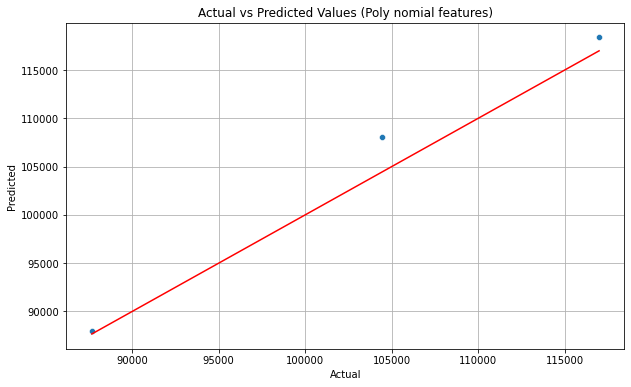

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values (Poly nomial features)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

The code block defines two lists: `model_labels` and `predicted_values`. The `model_labels` list contains the names of various regression algorithms used in the model, including Linear Regression, Random Forest, Support Vector Regressor, Gradient Boosting Regressor, and others. The `predicted_values` list contains the predicted output (`y_pred`) from each respective model.

A matplotlib figure is then created with specific dimensions. A seaborn line plot is drawn for each model, plotting the predicted values (`y_pred`) against the actual values (`y_test`). This is done in a loop that iterates through each model and its corresponding predicted values.

Grid lines are added for better visualization, a legend is added to identify each line plot.

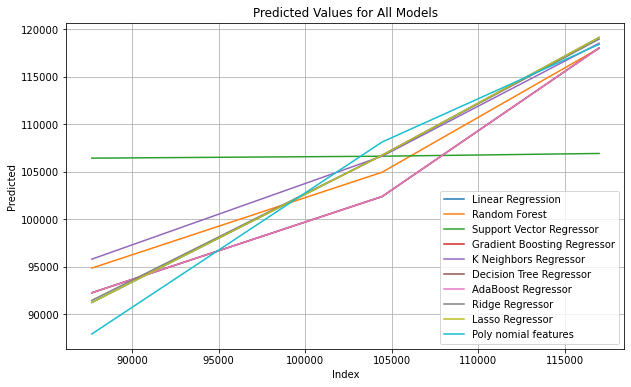

In [33]:
model_labels = ['Linear Regression', 'Random Forest', 'Support Vector Regressor', 'Gradient Boosting Regressor',
                'K Neighbors Regressor', 'Decision Tree Regressor', 'AdaBoost Regressor',
                'Ridge Regressor','Lasso Regressor','Poly nomial features']
predicted_values = [y_pred, y_pred_rf, y_pred_sv, y_pred_GBR, y_pred_KN, y_pred_DTR, y_pred_ABR,
                   y_pred_R, y_pred_L, y_pred_poly]

plt.figure(figsize=(10, 6))

for label, pred in zip(model_labels, predicted_values):
    sns.lineplot(x=y_test, y=pred, label=label)

plt.title('Predicted Values for All Models')
plt.xlabel('Index')
plt.ylabel('Predicted')
plt.grid(True)
plt.legend()
plt.show()


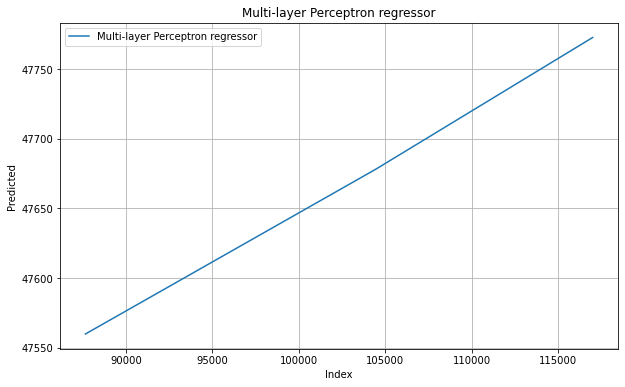

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=y_test, y=y_pred_MLPR, label='Multi-layer Perceptron regressor')
plt.title('Multi-layer Perceptron regressor')
plt.xlabel('Index')
plt.ylabel('Predicted')
plt.grid(True)
plt.legend()
plt.show()

**Numpy**, used primarily for numerical and mathematical operations on multi-dimensional arrays and matrices. Offering a wide array of high-level mathematical functions, it greatly simplifies the implementation of complex computations.

In [35]:
import numpy as np

The code creates an array `arr` containing the results of various prediction models for the year 2021. For each item in the array, it converts the numpy array to a list, concatenates it into a single string, and then converts the string to a float. These processed prediction results are then extracted back to their respective variables. The code then creates a new dictionary `row_2021`, encapsulating various parameters including the gas market, year, production, and all the prediction values. Finally, this dictionary is appended as a new row to the existing dataframe `data`. This approach enables you to compare the predictions of different models in a structured way.

In [36]:
arr = [pred_2021, y_pred_rf_2021, y_pred_sv_2021, y_pred_GBR_2021,
             y_pred_KN_2021, y_pred_DTR_2021, y_pred_ABR_2021, y_pred_MLPR_2021,
      y_pred_R_2021,y_pred_L_2021,y_pred_poly_2021]


for i in range(len(arr)):
    arr[i] = np.array(arr[i]).tolist()
    arr[i] = ''.join(map(str, arr[i]))
    arr[i] = float(arr[i])

pred_2021, y_pred_rf_2021, y_pred_sv_2021, y_pred_GBR_2021, y_pred_KN_2021, y_pred_DTR_2021,y_pred_ABR_2021, y_pred_MLPR_2021,y_pred_R_2021,y_pred_L_2021,y_pred_poly_2021 = arr


**Data with Predictions**

In [37]:
row_2021 = {'gas market':'Saudi Arabia','Year':2021,'production':120484.9224,
            'Prediction_LR':pred_2021,'Prediction_rf':y_pred_rf_2021,'Prediction_sv':y_pred_sv_2021,
            'Prediction_GBR':y_pred_GBR_2021,'Prediction_KN':y_pred_KN_2021,
            'Prediction_DTR':y_pred_DTR_2021,'Prediction_ABR':y_pred_ABR_2021,
            'Prediction_MLPR':y_pred_MLPR_2021,'Prediction_R':y_pred_R_2021,
            'Prediction_L':y_pred_L_2021,'Prediction_poly':y_pred_poly_2021}

data = data.append(row_2021,ignore_index=True)
data

,gas market,Year,production,Prediction_LR,Prediction_rf,Prediction_sv,Prediction_GBR,Prediction_KN,Prediction_DTR,Prediction_ABR,Prediction_MLPR,Prediction_R,Prediction_L,Prediction_poly
0,Saudi Arabia,2010,87660.0000,91237.111143,94854.0000,106418.257083,92260.394371,95795.00,92260.00,92260.00,47559.858397,91464.236959,91237.170672,87929.860050
1,Saudi Arabia,2011,92260.0000,94333.777750,94854.0000,106346.514893,92260.394371,95795.00,92260.00,92260.00,47583.509814,94516.586333,94333.825662,92618.862948
2,Saudi Arabia,2012,99330.0000,97430.444356,97682.0000,106316.268912,99330.254480,95795.00,99330.00,99330.00,47607.161232,97568.935707,97430.480653,96981.581987
3,Saudi Arabia,2013,100030.0000,100527.110962,99650.0000,106354.772009,100030.169118,99680.00,100030.00,99330.00,47630.812650,100621.285080,100527.135644,101018.017167
4,Saudi Arabia,2014,102380.0000,103623.777568,101897.0000,106465.410003,102380.096542,101205.00,102380.00,102380.00,47654.464067,103673.634454,103623.790635,104728.168488
5,Saudi Arabia,2015,104450.0000,106720.444174,104936.3044,106620.990569,102380.096542,106620.00,102380.00,102380.00,47678.115485,106725.983828,106720.445626,108112.035950
6,Saudi Arabia,2016,110860.0000,109817.110780,111152.4440,106774.589997,110859.900329,112930.11,110860.00,110860.00,47701.766903,109778.333202,109817.100617,111169.619553
7,Saudi Arabia,2017,115000.2200,112913.777387,113920.7496,106882.808681,115000.013619,116500.11,115000.22,115000.22,47725.418320,112830.682576,112913.755608,113900.919298
8,Saudi Arabia,2018,118000.0000,116010.443993,116798.8484,106925.644290,117999.728420,116500.11,118000.00,118000.00,47749.069738,115883.031950,116010.410599,116305.935183
9,Saudi Arabia,2019,117000.0000,119107.110599,117968.6154,106909.776489,117999.728420,118500.00,118000.00,118000.00,47772.721156,118935.381324,119107.065590,118384.667210


# Selecting the Most Accurate Model.

Among all these models, the most accurate prediction was achieved using the model that incorporates PolynomialFeatures. PolynomialFeatures is a method in the scikit-learn library used to transform features by creating polynomial features based on the maximum degree you specify, allowing for more precise predictions.

we can see in 
- Mean Sq Error: 5133545.01
- Coefficients determination: 0.96
- production Prediction 2021: [121563.27968645]
******

# Summary 
**********
I worked with a small dataset consisting of ten rows and three columns. The project involved using multiple models to determine the most accurate prediction model. After thorough evaluation, a model was selected. Additionally, I created visual charts for each tested model. It is important to note that the selected model may not be suitable for all datasets, as each dataset is unique and requires a tailored model.